In [9]:
%matplotlib inline  


import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from audioanalytics import *
import matplotlib.colors as colors
import os
import tables
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
os.chdir("plots/audio")

In [ ]:
classic = AudioAnalytics('Beethoven-Piano Sonata-classical.mp3')
classic.powerspectrum()
plt.figure()
plt.imshow(np.log(classic.processed), origin='lower', aspect='auto', interpolation='nearest')

In [ ]:
hiphop = AudioAnalytics('CuzOh-Take You Home-hiphop.mp3')
hiphop.powerspectrum()

In [ ]:
electro = AudioAnalytics('So Inawaga-Logo Queen-electronic.mp3')
electro.powerspectrum()

In [ ]:
metal = AudioAnalytics('clean-inheritance from the classical-metal.mp3')
metal.powerspectrum()
fig = plt.figure(figsize=(20,10))
plt.subplot(221)
plt.ylabel("frequency")
plt.xlabel("time")
plt.title("Metal Style Powerspectrum")
plt.imshow(np.log(metal.processed), origin='lower', aspect='auto', interpolation='nearest')
plt.subplot(222)
plt.ylabel("frequency")
plt.xlabel("time")
plt.title("Classical Style Powerspectrum")
plt.imshow(np.log(classic.processed), origin='lower', aspect='auto', interpolation='nearest')
plt.subplot(223)
plt.ylabel("frequency")
plt.xlabel("time")
plt.title("Hip Hop Style Powerspectrum")
plt.imshow(np.log(hiphop.processed), origin='lower', aspect='auto', interpolation='nearest')
plt.subplot(224)
plt.ylabel("frequency")
plt.xlabel("time")
plt.title("Electronic Style Powerspectrum")
plt.imshow(np.log(electro.processed), origin='lower', aspect='auto', interpolation='nearest')
plt.savefig('../powerspectra.png')

In [ ]:
classic = FluctuationPattern('Beethoven-Piano Sonata-classical.mp3')
classic_fp = classic.get_feature_matrix()
hiphop = FluctuationPattern('CuzOh-Take You Home-hiphop.mp3')
hiphop_fp = hiphop.get_feature_matrix()
electro = FluctuationPattern('So Inawaga-Logo Queen-electronic.mp3')
electro_fp = electro.get_feature_matrix()
metal = FluctuationPattern('clean-inheritance from the classical-metal.mp3')
metal_fp = metal.get_feature_matrix()

In [ ]:
fig = plt.figure(figsize=(20,10))

rh = np.abs(np.sum(metal_fp, axis = 0))
plt.subplot(221)
ticks_lbl = np.arange(0,600,50)        
ticks_loc = (np.arange(float(len(ticks_lbl))))/len(ticks_lbl)*len(rh)
plt.xticks(ticks_loc,ticks_lbl)
plt.title("Metal Style Histogramm")
plt.xlabel("bpm")
plt.ylabel("rythmic energy")
ax = plt.gca()
ax.bar(range(len(rh)),rh)

rh = np.abs(np.sum(classic_fp, axis = 0))
plt.subplot(222)
ticks_lbl = np.arange(0,600,50)        
ticks_loc = (np.arange(float(len(ticks_lbl))))/len(ticks_lbl)*len(rh)
plt.xticks(ticks_loc,ticks_lbl)
plt.title("Classical Style Histogramm")
plt.xlabel("bpm")
plt.ylabel("rythmic energy")
ax = plt.gca()
ax.bar(range(len(rh)),rh)

rh = np.abs(np.sum(hiphop_fp, axis = 0))
plt.subplot(223)
ticks_lbl = np.arange(0,600,50)        
ticks_loc = (np.arange(float(len(ticks_lbl))))/len(ticks_lbl)*len(rh)
plt.xticks(ticks_loc,ticks_lbl)
plt.title("Hip Hop Style Histogramm")
plt.xlabel("bpm")
plt.ylabel("rythmic energy")
ax = plt.gca()
ax.bar(range(len(rh)),rh)

rh = np.abs(np.sum(electro_fp, axis = 0))
plt.subplot(224)
ticks_lbl = np.arange(0,600,50)        
ticks_loc = (np.arange(float(len(ticks_lbl))))/len(ticks_lbl)*len(rh)
plt.xticks(ticks_loc,ticks_lbl)
plt.title("Electro Style Histogramm")
plt.xlabel("bpm")
plt.ylabel("rythmic energy")
ax = plt.gca()
ax.bar(range(len(rh)),rh)

plt.savefig('../rhythm_hist.png')

In [ ]:
sel = range(12,24)
sel = [0,4,8,10] + sel
fig = plt.figure(figsize=(15,4))
ax = plt.gca()
ax.xaxis.set_ticks(AudioAnalytics.bark[sel])
ax.xaxis.set_ticklabels(AudioAnalytics.bark[sel]/1000.)
plt.grid()
plt.xlabel("frequency[kHz]", fontsize=14)
plt.ylabel("[bark]",  fontsize=14)
plt.plot(AudioAnalytics.bark,range(1,25),'r-')
plt.plot(AudioAnalytics.bark,range(1,25),'ko', markersize=3)
plt.savefig('../bark.png')

In [ ]:
CONST_spread = np.zeros((24,24))
for i in range(24):
    CONST_spread[i,:] = 10**((15.81+7.5*((i-np.arange(24))+0.474)-17.5*(1+((i-np.arange(24))+0.474)**2)**0.5)/10)
plt.figure(figsize=(8,6))
CS = plt.imshow(CONST_spread, origin='upper', aspect='equal', interpolation='nearest', cmap="gray", norm = colors.LogNorm(vmin =CONST_spread.min() , vmax = 1.))
plt.colorbar(CS)
plt.savefig('../masking.png')

In [ ]:
example1 = np.zeros((24,100))
example1[[0,4,8,12,16,20],:] = 1.
example2 = np.zeros((24,100))
example2[:,[i*5 for i in range(1,20)]] = 1.
plt.figure(figsize=(20,10))
plt.subplot(321)
plt.title("original horizontal matrix")
plt.imshow(example1, origin='lower', aspect='auto', interpolation='nearest', cmap="gray")
plt.subplot(323)
plt.title("masked horizontal matrix")
CS = plt.imshow(np.dot(CONST_spread,example1), origin='lower', aspect='auto', interpolation='nearest', cmap="gray")

plt.subplot(322)
plt.title("original vertical matrix")
plt.imshow(example2, origin='lower', aspect='auto', interpolation='nearest', cmap="gray")
plt.subplot(324)
plt.title("masked vertical matrix")
CS = plt.imshow(np.dot(CONST_spread,example2), origin='lower', aspect='auto', interpolation='nearest', cmap="gray")

plt.subplot(325)
plt.title("original horizontal matrix profile")
plt.plot(example1[:,1])
plt.subplot(326)
plt.title("masked horizontal matrix profile")
plt.plot(np.dot(CONST_spread,example1[:,1]))

plt.savefig('../masking_examples.png')



In [ ]:
np.dot(CONST_spread,example1)[:,1]

In [ ]:
plt.figure(figsize=(12,5))
plt.xscale('log')
plt.grid()
plt.ylabel("Loudness[dB(SPL)]", fontsize=14)
plt.xlabel("frequency [kHz]", fontsize=14)
plt.xticks(AudioAnalytics.loudn_freq/1000.)
for i in range(6):
    plt.plot(AudioAnalytics.loudn_freq/1000.,AudioAnalytics.eq_loudness[i], label=str(AudioAnalytics.phons[i+1]) + " phon")
    plt.plot(AudioAnalytics.loudn_freq/1000.,AudioAnalytics.eq_loudness[i], "ko", markersize=3)
lgd = plt.legend(loc=2, bbox_to_anchor=(1.0,1.02))
plt.xlim([10**-1.7,10**1.4])
plt.savefig('../phon.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
def sone(x):
    if x > 40:
        return 2**(0.1*(x-40))
    else:
        return (x/40.)**2.642
y = np.arange(120)
x = map(sone,y)
plt.figure(figsize=(12,4))
plt.grid()
plt.plot(x,y)
plt.ylabel("Loudness level[phon]", fontsize=14)
plt.xlabel("Loudness sensation[sone]", fontsize=14)
plt.xlim([-1,65])
plt.ylim([0,100])
plt.savefig("../sone.png")

In [ ]:
electro = AudioAnalytics('So Inawaga-Logo Queen-electronic.mp3')
electro.compute_sone(plot=False)

In [ ]:
plt.figure(figsize=(20,5))
plt.imshow(electro.processed, origin='lower', aspect='auto', interpolation='nearest')

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(511)
plt.title("critical band 0")
plt.plot(electro.processed[0,500:1300], 'b-')
plt.grid()
plt.subplot(512)
plt.title("critical band 3")
plt.plot(electro.processed[3,500:1300], 'r-')
plt.grid()
plt.subplot(513)
plt.title("critical band 10")
plt.plot(electro.processed[10,500:1300], 'y-')
plt.grid()
plt.subplot(514)
plt.title("critical band 17")
plt.plot(electro.processed[17,500:1300], 'g-')
plt.grid()
plt.subplot(515)
plt.title("all previous curve overlayed")
plt.plot(electro.processed[0,500:1300],'b-')
plt.plot(electro.processed[3,500:1300],'r-')
plt.plot(electro.processed[10,500:1300],'y-')
plt.plot(electro.processed[17,500:1300],'g-')
plt.grid()
plt.tight_layout()
plt.savefig("../periodicity.png")

In [ ]:
plt.figure(figsize=(15,4))
plt.grid()
plt.plot(electro.processed[0,500:1300])
plt.plot(electro.processed[3,500:1300])
plt.plot(electro.processed[10,500:1300])
plt.plot(electro.processed[17,500:1300])
plt.plot(electro.processed[22,500:1300])

In [ ]:
256/11025.

In [ ]:
fp = FluctuationPattern('So Inawaga-Logo Queen-electronic.mp3')

In [ ]:
fs_model = fp.fs_model_curve(11025./2**16 * np.arange(61))

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("Modulation Frequency[Hz]", fontsize=14)
plt.ylabel("Weighting factor", fontsize=14)
plt.plot(np.arange(11),FluctuationPattern.fs_model[:11], "ko", markersize=3)
plt.plot(11025./2**16 * np.arange(61)[1:],fs_model[1:])
plt.grid()
plt.ylim([0,1.2])
plt.savefig("../fs_model.png")

In [ ]:
def fs_mod(x):
    return (x/4)+(4/x)

In [ ]:
x = (11025./2**16 * np.arange(61))[1:]
print x
y = map(fs_mod,x)

In [ ]:
plt.figure()
plt.plot(x,y)

In [3]:
classic = FluctuationPattern('Beethoven-Piano Sonata-classical.mp3')
classic_fp = classic.get_feature_matrix()
hiphop = FluctuationPattern('CuzOh-Take You Home-hiphop.mp3')
hiphop_fp = hiphop.get_feature_matrix()
electro = FluctuationPattern('So Inawaga-Logo Queen-electronic.mp3')
electro_fp = electro.get_feature_matrix()
metal = FluctuationPattern('clean-inheritance from the classical-metal.mp3')
metal_fp = metal.get_feature_matrix()

audioanalytics.py:298: RuntimeWarning: invalid value encountered in divide


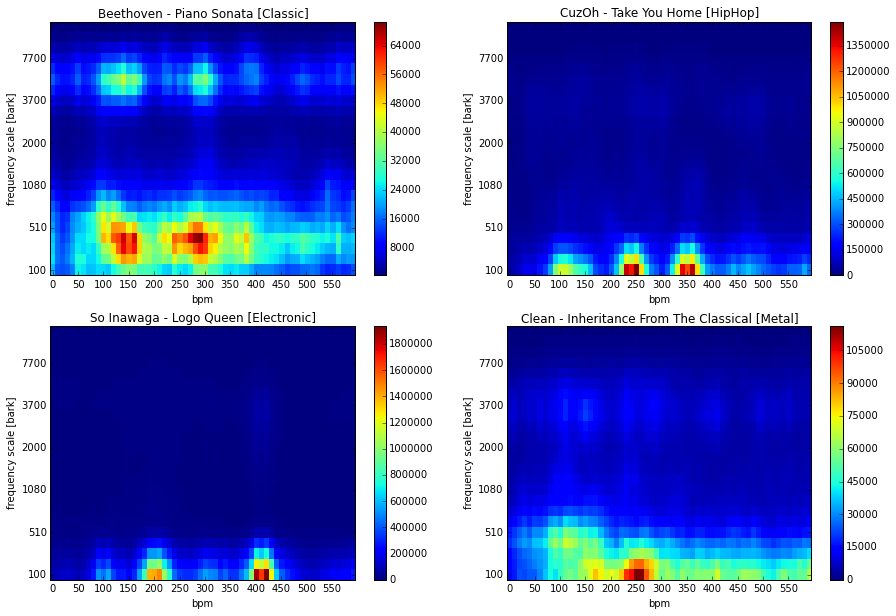

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(221)
FluctuationPattern.plot_frame(classic_fp,"Beethoven - Piano Sonata [Classic]")
plt.subplot(222)
FluctuationPattern.plot_frame(hiphop_fp,"CuzOh - Take You Home [HipHop]")
plt.subplot(223)
FluctuationPattern.plot_frame(electro_fp,"So Inawaga - Logo Queen [Electronic]")
plt.subplot(224)
FluctuationPattern.plot_frame(metal_fp,"Clean - Inheritance From The Classical [Metal]")

In [105]:
#load feature vectos
f = tables.open_file("/home/kayibal/sc-recom/code/msd_data/analysis_data/analysis2.h5", mode="r")

minmax = MinMaxScaler()
pca = PCA(n_components=60)
flucs_full = minmax.fit_transform(f.root.analysis.flucs[:])
flucs_comp = pca.fit_transform(np.asarray(flucs_full).transpose()).transpose()
f.close()

In [106]:
classic_comp = pca.transform(classic_fp.reshape(1,-1))
electro_comp = pca.transform(electro_fp.reshape(1,-1))
metal_comp = pca.transform(metal_fp.reshape(1,-1))
hiphop_comp = pca.transform(hiphop_fp.reshape(1,-1))

In [30]:
data = np.vstack((classic_comp, electro_comp, metal_comp, hiphop_comp))

In [38]:
dist = cdist(data,data)

In [42]:
for row in dist:
    print "%.3f & %.3f & %.3f & %.3f \\\\ \\hline" % (row[0], row[1], row[2], row[3])

0.000 & 5.824 & 1.694 & 4.584 \\ \hline
5.824 & 0.000 & 5.782 & 6.215 \\ \hline
1.694 & 5.782 & 0.000 & 4.608 \\ \hline
4.584 & 6.215 & 4.608 & 0.000 \\ \hline


In [126]:
classic_rec = pca.inverse_transform(flucs_comp[:,100]).reshape(24,-1)

In [100]:
flucs

1.0090924220095456

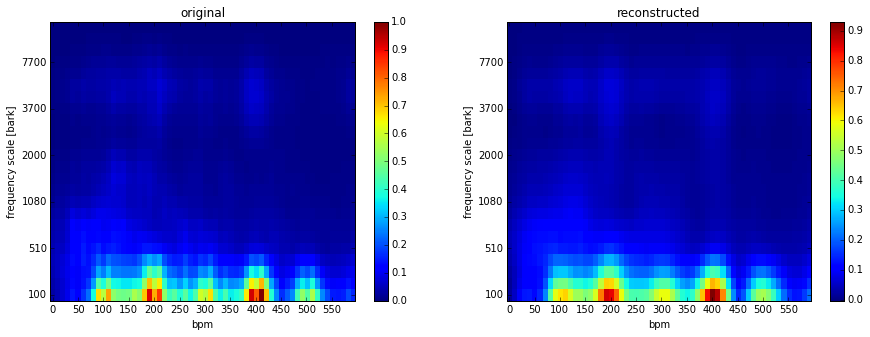

In [127]:
plt.figure(figsize=(15,5))
plt.subplot(121)
FluctuationPattern.plot_frame(flucs_full[:,100].reshape(24,-1), "original")
plt.subplot(122)
FluctuationPattern.plot_frame(classic_rec, "reconstructed")

In [120]:
f = tables.open_file("/home/kayibal/sc-recom/code/msd_data/analysis_data/analysis2.h5", mode="r")
flucs = np.array(f.root.analysis.flucs[:])
f.close()

In [123]:
average_fp = np.mean(flucs, axis= 1)

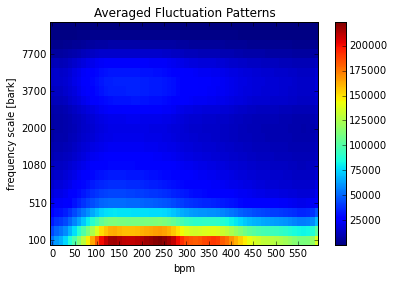

In [130]:
w = np.matrix(np.arange(100).reshape((10,10)))

In [131]:
x = np.matrix(np.ones(10))

In [132]:
x

matrix([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [134]:
x = x.T

In [137]:
w[:,:2].T*x

matrix([[ 450.],
        [ 460.]])